In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data
---

We'll use [Yahoo! Finance](https://finance.yahoo.com/quote/AAPL) to get a few years worth of stock prices from Apple, Inc. (AAPL)

In [3]:
# Load data

df = pd.read_csv('./datasets/AAPL.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1981-01-02,0.154018,0.155134,0.154018,0.154018,0.120388,21660800
1,1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117771,35728000
2,1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112536,45158400
3,1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107739,55686400
4,1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105558,39827200


In [4]:
df.shape

(10396, 7)

In [5]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
# Change date column to be datetime dtype

df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

## Set the `Date` column to be the index
---

We'll be exploring a few `pandas` methods related to time series data. In order for them to work we need to set the `Date` column to be the index.

In [11]:
# Set Date to be in the index

df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.120388,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117771,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112536,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107739,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105558,39827200


In [12]:
# Sort the index

df = df.sort_index()

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.120388,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117771,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112536,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107739,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105558,39827200


In [13]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700
2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90131400


## Explore the data
---

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `Adj Close`: The closing price, when accounting for dividend payments, stock splits, etc.
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

In [16]:
df.loc['2020']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.894325,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.175926,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.759003,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.412117,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.593033,132079200
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.994507,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.679642,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.873077,121047300


In [17]:
df.loc['2019-12']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,66.817497,67.062500,65.862503,66.040001,64.990601,94487200
2019-12-03,64.577499,64.882500,64.072502,64.862503,63.831799,114430400
2019-12-04,65.267502,65.827499,65.169998,65.434998,64.395226,67181600
2019-12-05,65.947502,66.472504,65.682503,66.394997,65.339943,74424400
2019-12-06,66.870003,67.750000,66.824997,67.677498,66.602066,106075600
2019-12-09,67.500000,67.699997,66.227501,66.730003,65.669640,128042400
2019-12-10,67.150002,67.517502,66.464996,67.120003,66.053421,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.616837,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.786583,137310400


## Filtering by dates
---

Now that our `Date` column is the index, we can filter our data in unique ways. Try `df['2018']` in the cell below:

You can also filter by month:

## Resampling
---

`df.resample()` is similar to `df.groupby()`, but with dates instead of categories.

In [21]:
df.resample('Y').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-12-31,0.108883,0.109265,0.108548,0.108548,0.084846,3.239899e+07
1982-12-31,0.085446,0.086665,0.084630,0.085459,0.066799,8.444667e+07
1983-12-31,0.167274,0.171085,0.163449,0.167274,0.130750,1.759408e+08
1984-12-31,0.119956,0.122294,0.117642,0.119651,0.093525,1.659250e+08
1985-12-31,0.091057,0.092023,0.089937,0.090233,0.070531,1.805249e+08
1986-12-31,0.144586,0.147048,0.142207,0.144913,0.113271,2.107637e+08
1987-12-31,0.347817,0.355806,0.339820,0.347751,0.272345,2.362502e+08
1988-12-31,0.371034,0.376663,0.365092,0.370884,0.292508,1.632134e+08
1989-12-31,0.371563,0.377679,0.365881,0.371953,0.296152,2.020072e+08


In [23]:
df.resample('MS').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-01,0.141768,0.142086,0.141316,0.141316,0.110459,2.899947e+07
1981-02-01,0.118215,0.118627,0.117892,0.117892,0.092150,1.692733e+07
1981-03-01,0.111328,0.111683,0.110871,0.110871,0.086663,3.185076e+07
1981-04-01,0.121811,0.122183,0.121545,0.121545,0.095006,2.556800e+07
1981-05-01,0.129688,0.130301,0.129436,0.129436,0.101174,2.952096e+07
...,...,...,...,...,...,...
2021-11-01,153.603810,155.509048,152.586190,154.255716,154.017750,8.052519e+07
2021-12-01,173.155455,175.632275,171.252727,173.552727,173.331892,1.111258e+08
2022-01-01,170.201500,172.447999,167.639500,169.861500,169.645361,1.054223e+08


## Lookup challenge
---

Where can you find all the resample options?

In [24]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.120388,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117771,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112536,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107739,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105558,39827200


## Rolling
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of methods for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` method with a statistical function chained to it. 

In [25]:
df.rolling(3).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-06,0.149926,0.150298,0.149554,0.149554,0.116898,3.418240e+07
1981-01-07,0.144717,0.144717,0.144159,0.144159,0.112682,4.552427e+07
1981-01-08,0.139509,0.139509,0.138951,0.138951,0.108611,4.689067e+07
...,...,...,...,...,...,...
2022-03-18,158.723333,161.826665,157.283336,161.396662,161.396662,1.004223e+08
2022-03-21,160.876664,163.943334,160.133332,163.326665,163.326665,9.825933e+07
2022-03-22,163.176662,166.750000,162.559998,166.060003,166.060003,1.002315e+08


## Challenge
---

Plot a line chart with two lines:
1. The `Open` price
2. The 30 day rolling mean of the `Open` price

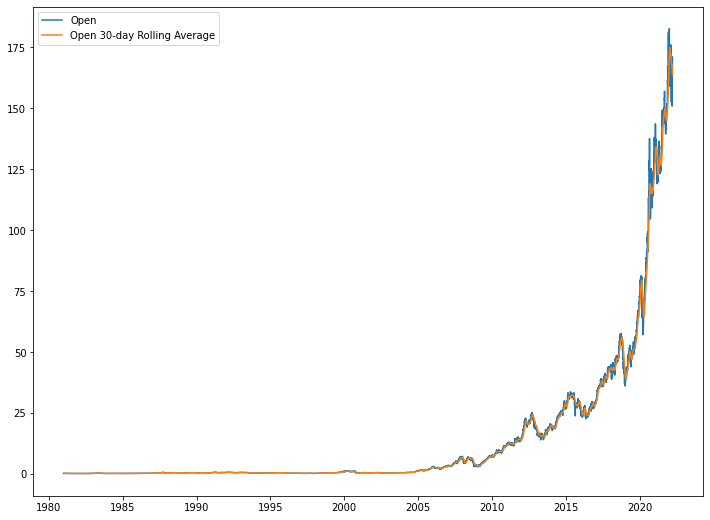

In [37]:
labels = ['Open', 'Open 30-day Rolling Average']
plt.figure(figsize=(12,9))
plt.plot(df['Open'])
plt.plot(df['Open'].rolling(30).mean())
plt.legend(labels= labels);

## `.diff()`
---
The `.diff()` calculates the difference in a value between a value at time $T$ and that same value at $T-1$. For example, if I have a dataframe of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

When I call `.diff()`, I get the following:
<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>10</td>
    </tr>
  </tbody>
</table>
<div style="clear: both;"></div>


In [40]:
df.diff(2).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-18,3.459992,4.479996,5.299988,4.390000,4.390000,21051000.0
2022-03-21,4.899994,5.350006,5.379990,4.760010,4.760010,20196000.0
2022-03-22,5.000000,4.940002,5.150009,4.840011,4.840011,-41819200.0
2022-03-23,4.480010,6.289993,4.639999,4.830002,4.830002,2251300.0
2022-03-24,5.550003,4.720001,5.300003,5.250000,5.250000,8599400.0


In [41]:
df.diff().diff()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-06,-0.003907,-0.002791,-0.003349,-0.003349,-0.002618,-4636800.0
1981-01-07,0.000559,0.000559,0.000559,0.000559,0.000438,1097600.0
1981-01-08,0.003348,0.003348,0.003348,0.003348,0.002616,-26387200.0
...,...,...,...,...,...,...
2022-03-18,0.339996,2.479996,-1.040008,2.330002,2.330002,74420600.0
2022-03-21,1.100006,-1.609986,1.120010,-1.959992,-1.959992,-75275600.0
2022-03-22,-1.000000,1.199982,-1.349991,2.039993,2.039993,13260400.0


## `.pct_change()` 
---

`.pct_change()` works similar to `.diff()`, except we're calculating the difference as a change in percentage: $X_{t}/X_{t-1} - 1$

So if I have my table of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

The `.pct_change()` will look like this:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>.1</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>


We'd interpret 1-2-2019 as a 10% increase (110/100 - 1 = .10) in price from the day before. Again, the first row is a `NaN` since there is no prior row to calcuate the percent change from.

In [43]:
df.pct_change().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,-0.018115,-0.025178,-0.021738,-0.021738,-0.021738,0.649431
1981-01-06,-0.044284,-0.044284,-0.044448,-0.044448,-0.044451,0.263950
1981-01-07,-0.042468,-0.042468,-0.042633,-0.042633,-0.042626,0.233135
1981-01-08,-0.020160,-0.020160,-0.020242,-0.020242,-0.020243,-0.284795


## Challenge
---

Create three **separate** plots:
1. One for the `Close` price
2. One for the `Close` price, using `.diff()`
3. One for the `Close` price as a percent change.

What happens to your overall data when you diff?

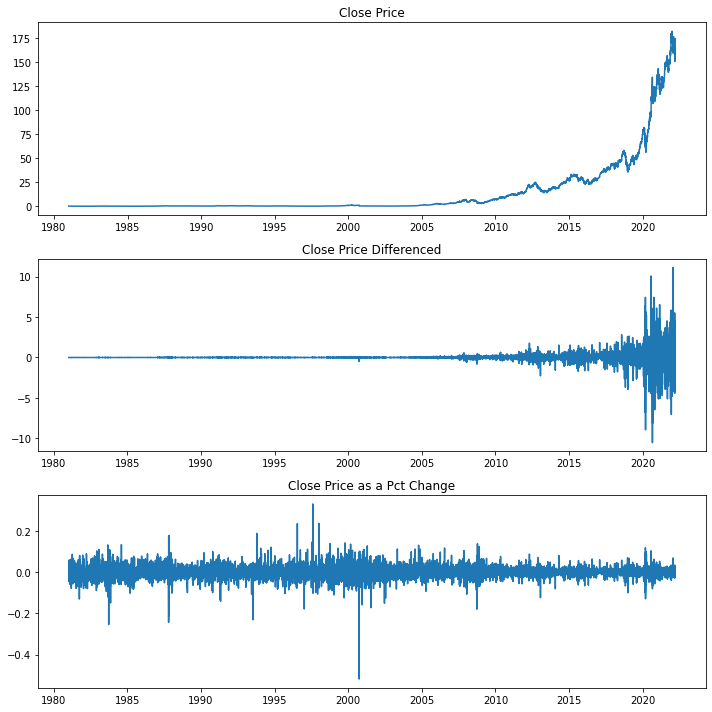

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
    
ax[0].plot( df['Close'] )
ax[1].plot( df['Close'].diff() )
ax[2].plot( df['Close'].pct_change() )
ax[0].set_title('Close Price')
ax[1].set_title('Close Price Differenced')
ax[2].set_title('Close Price as a Pct Change')

fig.tight_layout();

[Why would we difference?](https://otexts.com/fpp2/stationarity.html) Well, there is one assumption that is **required** for nearly every time series model: **stationarity**.
- If our time series is stationary, then we do not need to difference
- If our time series is not stationary, then we difference either once (`df.diff()`) or twice (`df.diff().diff()`). Differenced data often is stationary, so we difference our data, then model that!

## What is stationarity?
---

Informally, stationarity means that there **aren't systematic changes in our time series over time**.
- Our mean stays the same. (There is no trend.)
- The autocorrelation between $Y_t$ and $Y_{t-k}$ depends only on the size of our lag $k$. (There is no seasonality.)
- A [white noise process](https://stats.stackexchange.com/questions/7070/what-is-a-white-noise-process) is a common example of a stationary time series.

The problem is, many time series **aren't** stationary.
- The amount that stock prices vary on a day-to-day basis aren't going to be the same.
- Crop prices may increase or decrease over time; assuming a constant mean here doesn't make sense.


## Shifting
---

`df.shift()` is used to bring values from previous dates forward in time.

In [45]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.120388,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117771,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112536,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107739,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105558,39827200


In [46]:
df.shift().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,0.154018,0.155134,0.154018,0.154018,0.120388,21660800.0
1981-01-06,0.151228,0.151228,0.150670,0.150670,0.117771,35728000.0
1981-01-07,0.144531,0.144531,0.143973,0.143973,0.112536,45158400.0
1981-01-08,0.138393,0.138393,0.137835,0.137835,0.107739,55686400.0


## Creating a simple dataset
---

Let's create a simple dataset that tries to predict today's `Close` price using yesterday's `Close` price with today's `Open` price. 

**NOTE:** Remember we want stationarity!

In [47]:
df['Close_lag_1'] = df['Close'].shift(1)
df['Close_lag_2'] = df['Close'].shift(2)
df['Close_lag_7'] = df['Close'].shift(7)
df['Close_lag_30'] = df['Close'].shift(30)


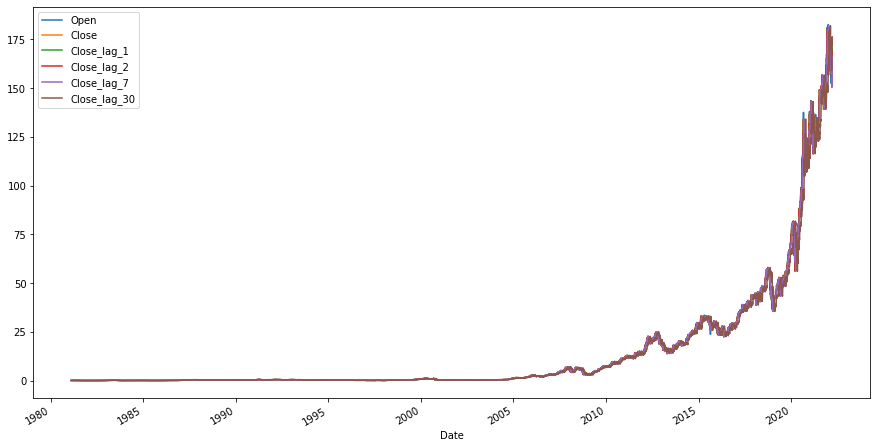

In [49]:
df[['Open','Close','Close_lag_1','Close_lag_2','Close_lag_7','Close_lag_30']].dropna().plot(figsize= (15,8));